## В этой лабраторной работе рассмотрим решение уравнение стационарного одномерного уравнения теплопроводности с помощью метода прогонки

## Задание взято из практикума по прикладной математике ВВ.Демченко
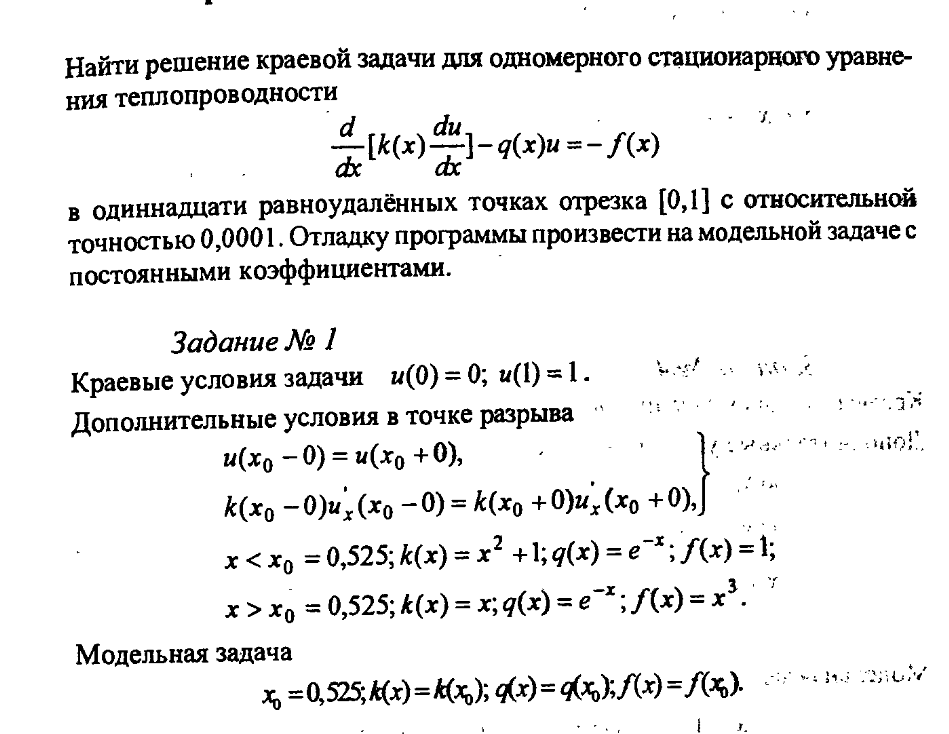

### Как мы можем видеть, в точке х0 = 0.525 функции k(x), f(x) и q(x) терпят разрыв первого рода, причем температура поток тепла k*u' в этой точке сохраняется - допполнительные условия в точке разрыва.

## Первое, что необходимо сделать- привести ДУ к СЛАУ. Эту системы мы далее решим методом прогонки.

In [116]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [117]:
x0 = 0.525
L = 100000
h = 1.0 / (L+1)
default = -12345.0

def k(x):
    return (x**2 + 1.0) if x < x0 else x

def q(x):
    return math.exp(-x)

def f(x):
    return 1 if x < x0 else x**3


# Linear equation: A*U_(l+1) + B * U_l + C * U_(l-1) = D
# Declare one linear equation
class Equation:
  def __init__(self, A, B, C, D):
    self.A = A
    self.B = B
    self.C = C
    self.D = D
  def __str__(self):
    return f"{self.A}, {self.B}, {self.C}, {self.D}"

# Function below returns A, B, C, D
def ComputeLinEq(x, h):
    A = k(x + 0.5*h) / (h**2)
    B = (-k(x + 0.5*h) - k(x - 0.5*h)) / (h**2) - q(x)
    C = k(x - 0.5*h) / (h**2)
    D = -f(x)
    return Equation(A, B, C, D)

#u_{l} = alpha * u_{l+1} + beta.
class Dependence:
  def __init__(self, l, alpha, beta):
    self.l = l
    self.alpha = alpha
    self.beta = beta
    
  def __str__(self):
    return f"i = {self.l}: {self.alpha}, {self.beta}"

In [118]:
# Create system of linear equations
equations = []
for i in range(L + 1):
    eq = ComputeLinEq(h * i, h)
    equations.append(eq)

values = np.empty(L + 1)
values.fill(default)
values[0] = 0.0
values[L] = 1.0

In [119]:
# Прогонка туда
dependencies = []

for i in range(L):
    if(i == 0):
        dependencies.append(Dependence(i, 0, values[0]))
    else:
        A, B, C, D = equations[i].A, equations[i].B, equations[i].C, equations[i].D
        alpha_prev, beta_prev = dependencies[-1].alpha, dependencies[-1].beta
        alpha = -A/(B + C * alpha_prev)
        beta = (D - C * beta_prev) / (B + C * alpha_prev)
        dependencies.append(Dependence(i, alpha, beta))

In [120]:
# Прогонка обратно
for i in range(L-1, -1, -1):
    alpha, beta = dependencies[i].alpha, dependencies[i].beta
    values[i] = alpha * values[i+1] + beta

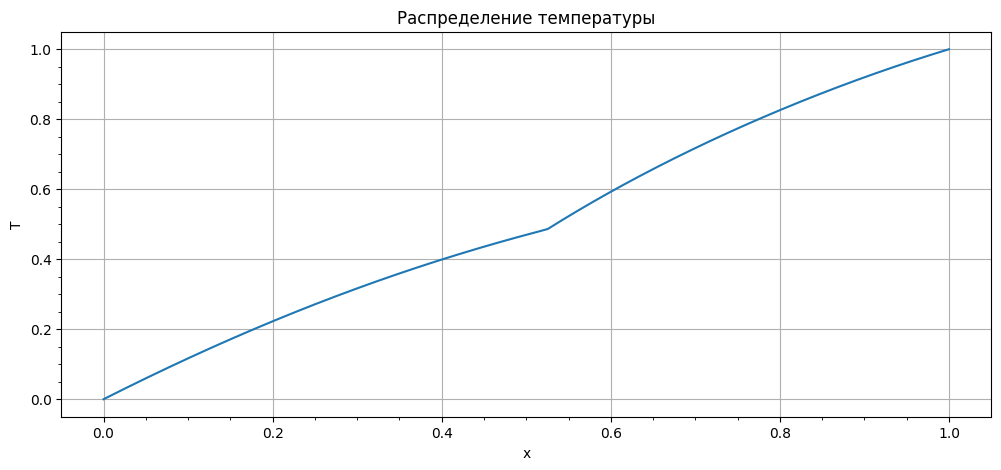

In [121]:
plt.figure(figsize=[12, 5], dpi=100)
x = np.arange(0.0, 1.0, h)
plt.plot(x, values)
plt.xlabel("x")
plt.ylabel("T")
plt.minorticks_on()
plt.grid()
plt.title("Распределение температуры")
plt.show()

## Точка разрыва функйий k(x), q(x), и f(x) проявляется в решении.

## Таким образом, удалось решить уравнение стационарного одномерного уравнения теплопроводности методом прогонки